# Import Libraries 

In [89]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Import cleaned dataset

In [91]:
#Import cleaned dataset
df=pd.read_csv('citibike_cleaned.csv')

# For now I am using the numeric columns for correlation analysis 
# Drop columns that are non numeric or not useful for correlation analysis


In [93]:
# Drop the columns 
cols_to_drop=['trip_id','bike_id','start_time','end_time','start_station_name','end_station_name','gender_desc']
df_numeric=df.drop(columns=cols_to_drop, errors='ignore')

# Convert some columns to numeric 

In [95]:
# Convert some columns to numeric
for col in ['weekday','subscriber','gender']:
    if col in df_numeric.columns:
        df_numeric[col]=df_numeric[col].astype('category').cat.codes

# Create a correlation matrix

In [97]:
corr_matrix=df_numeric.corr()

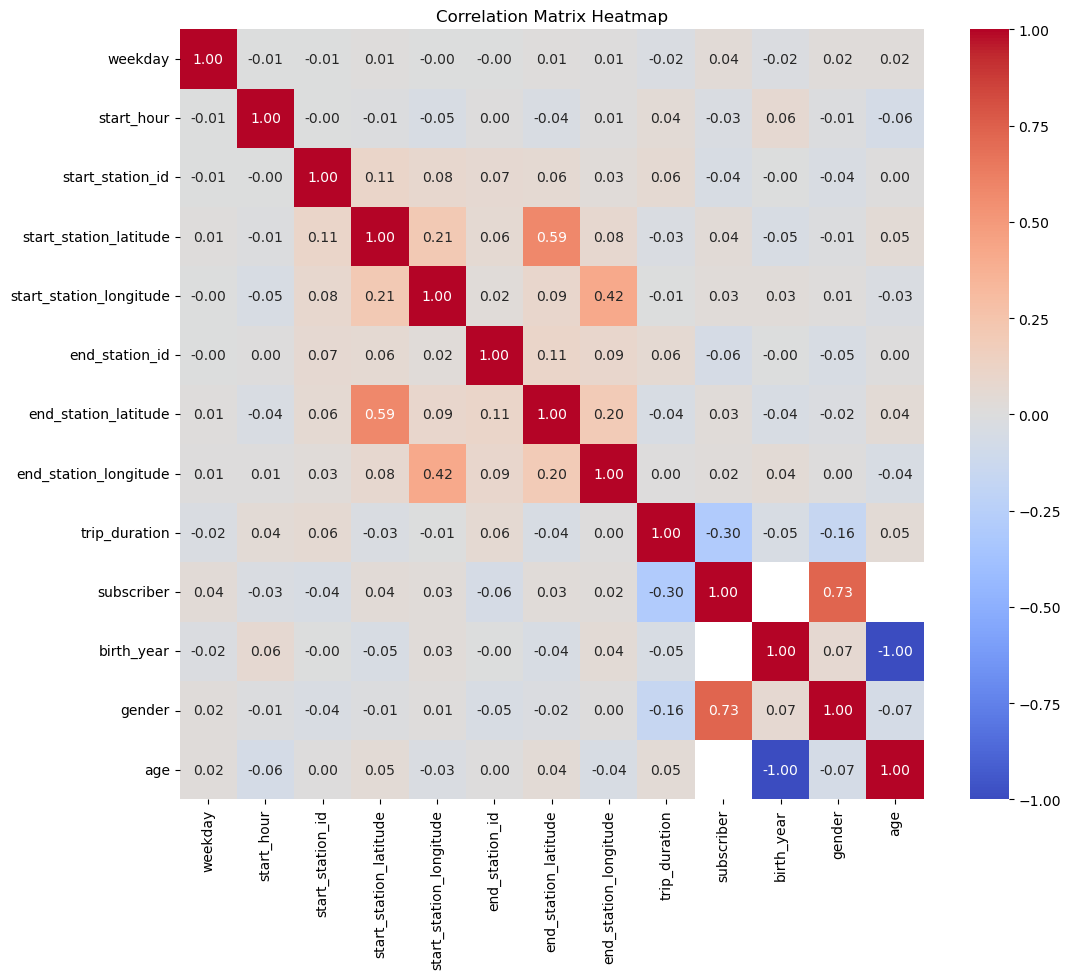

In [98]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


# The heatmap shows the pairwise correlation between numeric variables , positive coefficients indicate direct relationships while negative indicate inverse relationships. High absolute values suggest strong linear relationships. For example, if trip_duration correlates strongly with start_hour, that could be explored further.

In [100]:
# To identify the strongest correlations (excluding  self-correlations), I unstack the correlation matrix
corr_unstacked=corr_matrix.abs().unstack()
corr_unstacked=corr_unstacked[corr_unstacked<1]
# remove self correlations
strongest=corr_unstacked.sort_values(ascending=False).drop_duplicates()

In [101]:
# top 5 strongest correlation pairs
strongest.head(5)

age                      birth_year               1.000000
subscriber               gender                   0.733686
start_station_latitude   end_station_latitude     0.585723
start_station_longitude  end_station_longitude    0.418262
trip_duration            subscriber               0.296008
dtype: float64

# For the Scatterplot , select the top correlated pair

In [103]:
# get the first pair 
pair= strongest.index[0]

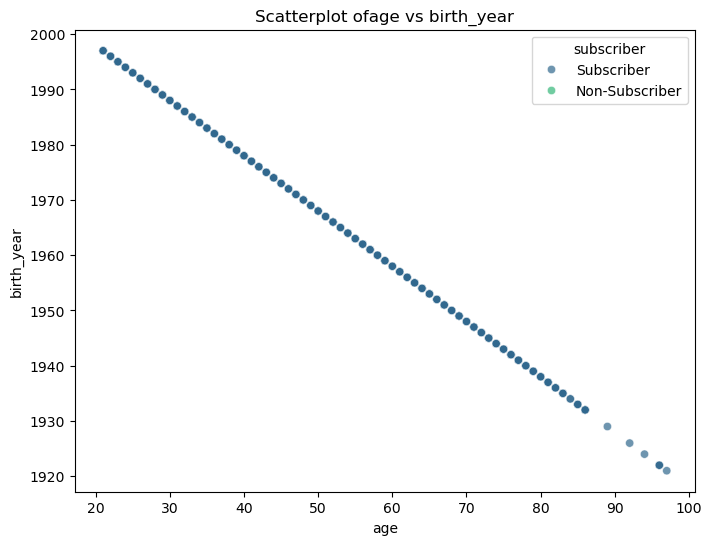

In [104]:
# scatterplot of the strongest correlated variables 
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=pair[0],y=pair[1],hue='subscriber',palette='viridis', alpha=0.7)
plt.title('Scatterplot of'  + pair[0] + ' vs ' + pair[1])
plt.show()

# The scatterplot for the variables '+pair[0] +' and the ' + pair[1] +' shows the relationship between these variables. The trend observed indecates whether the relationship is linear and if there are any outliers. Color differentiation by subscriber category can hint at group differences.

# Create a pairplot of the entire dataset ( for pairplot , I will include only numeric columns to make it readable and avoid too many columns)

In [107]:
numeric_cols=df_numeric.select_dtypes(include=['number']).columns.tolist()

In [108]:
numeric_cols

['weekday',
 'start_hour',
 'start_station_id',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_latitude',
 'end_station_longitude',
 'trip_duration',
 'subscriber',
 'birth_year',
 'gender',
 'age']

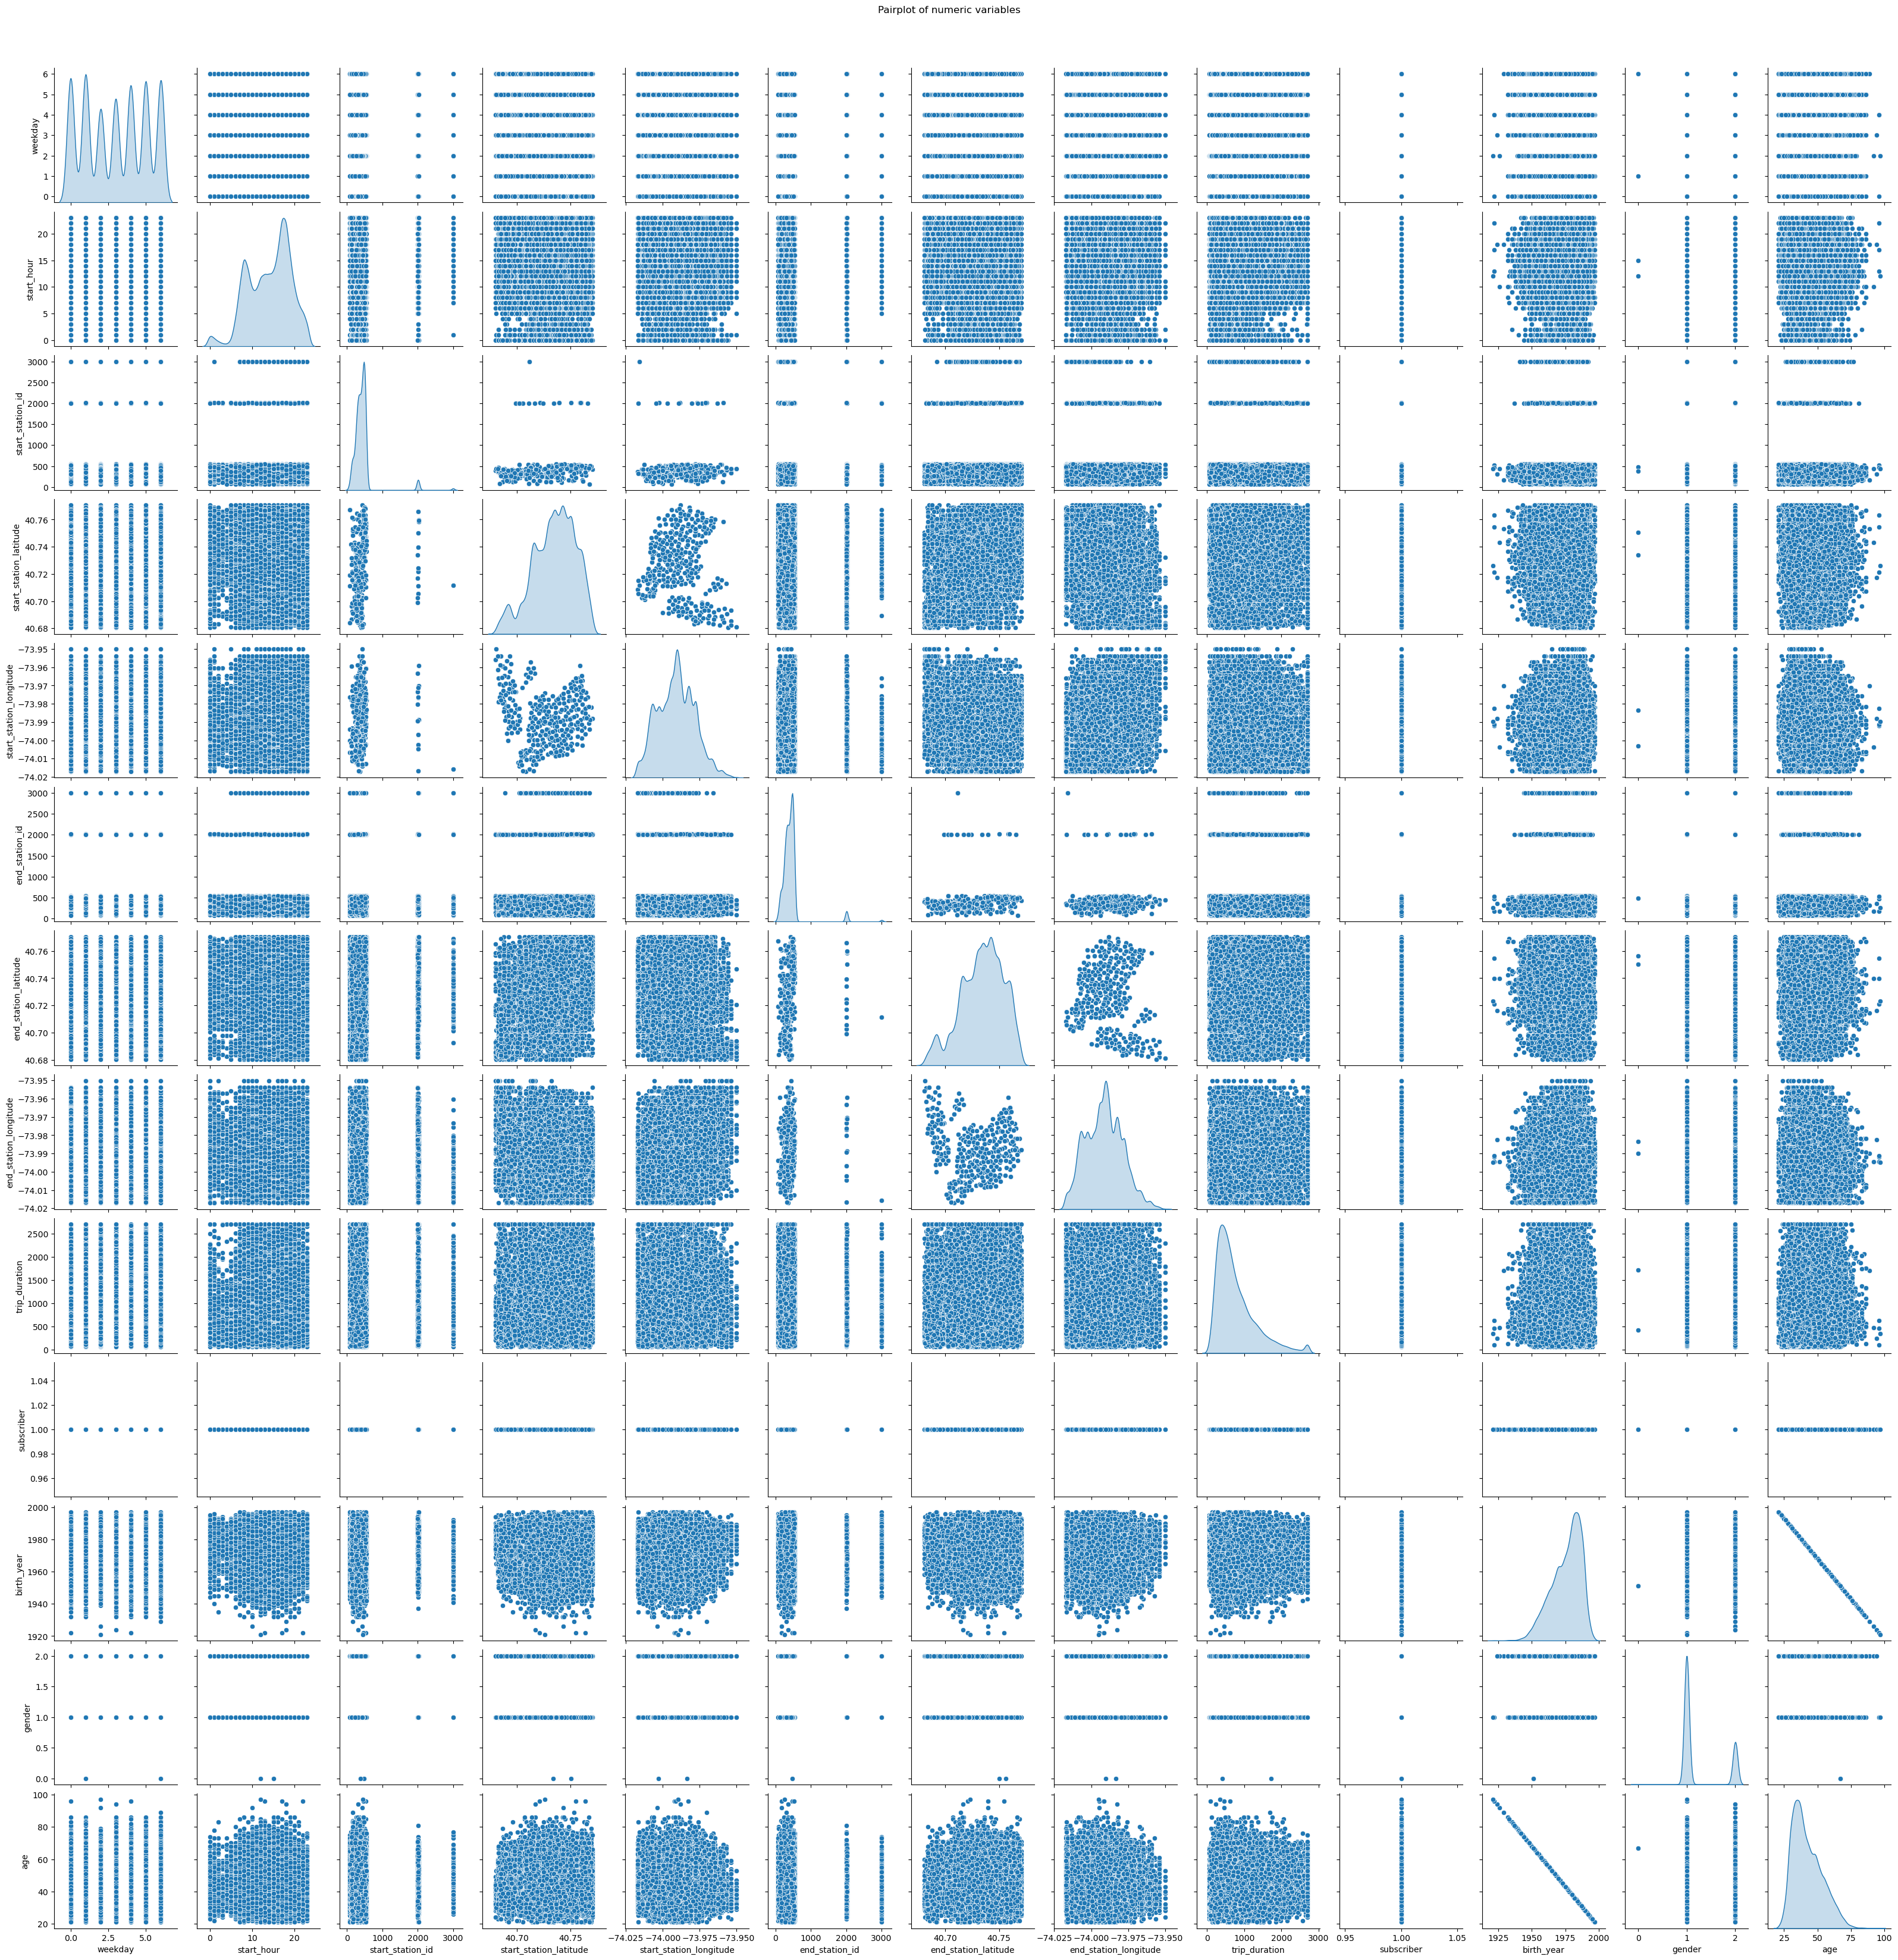

In [109]:
# pairplot for numeric variables
sns.pairplot(df_numeric[numeric_cols].dropna(),diag_kind='kde')
plt.suptitle('Pairplot of numeric variables', y=1.02)
plt.show()

# The pairplot provides insights into the distributions and pairwise relationships between numeric variables. It helps identify variables with skewed distributions, outliers, and potential linear / non-linear relationships. Variables with interesting patterns warrant further exploration.

# Create a categorical plot ( for this , I will use the weekday vs subscriber count to see the distribution)

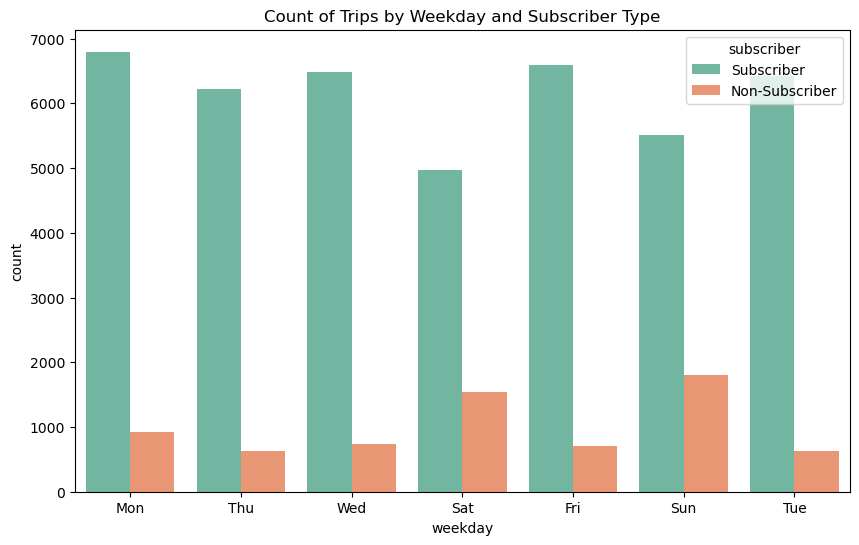

In [112]:
# categorical count plot plot for weekday vs subcriber
if 'weekday' in df.columns and 'subscriber' in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x='weekday', hue='subscriber', palette='Set2')
    plt.title('Count of Trips by Weekday and Subscriber Type')
else:
    print('weekday or subscriber column not found in dataframe')
    

# The categorical plot displays how the number of trips vary accross the weekdays and between subscriber and non-subscriber groups . Differences in distribution may suggest variations in usage patterns depending on the day of the week and subscription status.

# Define Hypothesise:
Based on the visual analysis ,one could explore whether the time of day impacts trip duration,or if the subscriber status is a strong predictor for trip duration.The visualizations raise questions about the dynamics between temporal variables(start_hour) and trip duration, as well as usage patterns accross weekdays.